# Admission Leads Interest Analysis

## Objective
To analyze admission leads and classify them into High Interested and Low Interested leads
based on available contact information.



## Dataset Description
- The dataset contains admission leads.
- Available columns:
  - Name
  - Contact Number



In [27]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("Excel1.xlsx")
print(df)

                     Name    Contact Number
0                Pratiksha  p:+917887975613
1          Pratik Garudkar     p:9284539651
2    gitanjali bhokare_005  p:+917875825005
3              Vivek Patil  p:+917058531008
4            Krishna Pawar  p:+919529959173
..                     ...              ...
150     Prashant L. Chavan  p:+918383837842
151        Sanjyot Gaikwad  p:+918669147564
152            Ajay shinde  p:+919881266657
153      Sudarshan Thaware  p:+919158357136
154          Shital Rathod              NaN

[155 rows x 2 columns]


In [28]:
print(df.columns)


Index(['Name ', 'Contact Number'], dtype='object')


In [29]:
df = df.rename(columns={
    df.columns[0]: 'Name',
    df.columns[1]: 'Contact'
})



In [30]:
# Clean contact
df['Contact'] = df['Contact'].fillna('').astype(str)



In [31]:
# Interest classification
def classify_interest(contact):
    contact = contact.replace('+', '').replace('p:', '').strip()
    if contact.isdigit() and len(contact) == 10 and contact != '8888888888':
        return 'High Interested'
    else:
        return 'Low Interested'

df['Interest_Level'] = df['Contact'].apply(classify_interest)



## Assumptions
- Leads with valid 10-digit contact numbers are considered High Interested.
- Invalid, missing, or incorrect contact numbers are considered Low Interested.
- Interest level is derived logically due to limited data availability.


In [32]:
# Summary
summary = df['Interest_Level'].value_counts()
print(summary)



Interest_Level
Low Interested     136
High Interested     19
Name: count, dtype: int64


## Visualization
The bar chart below shows the comparison between High Interested and Low Interested leads.


In [33]:

summary = df['Interest_Level'].value_counts()


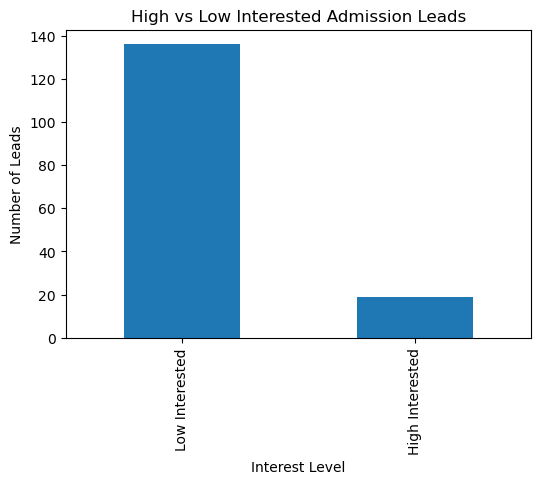

In [34]:
# Plot
plt.figure(figsize=(6,4))
summary.plot(kind='bar')
plt.title('High vs Low Interested Admission Leads')
plt.xlabel('Interest Level')
plt.ylabel('Number of Leads')
plt.show()


In [35]:
percentage = summary / summary.sum() * 100
print(percentage)


Interest_Level
Low Interested     87.741935
High Interested    12.258065
Name: count, dtype: float64


In [36]:
df['Lead_Score'] = df.apply(
    lambda x: 70 if x['Contact'].isdigit() and len(x['Contact']) == 10 else 30,
    axis=1
)


In [37]:
def interest_level(score):
    if score >= 80:
        return 'High'
    elif score >= 50:
        return 'Medium'
    else:
        return 'Low'

df['Interest_Category'] = df['Lead_Score'].apply(interest_level)


## Interest Classification Logic
A custom function is used to classify leads into High or Low interest categories
based on contact number validity.


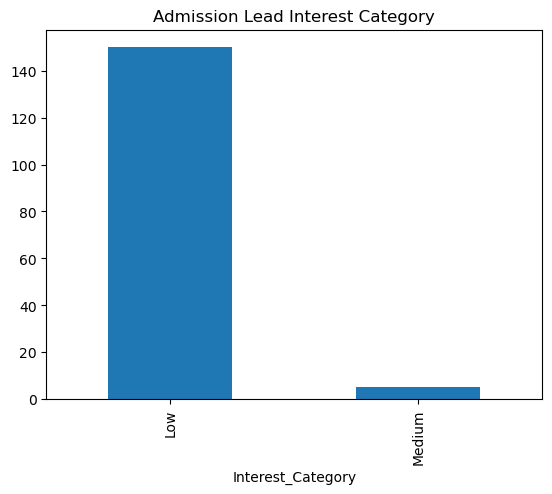

In [38]:
df['Interest_Category'].value_counts().plot(kind='bar')
plt.title('Admission Lead Interest Category')
plt.show()


In [39]:
df['Contact_Clean'] = df['Contact'].str.replace('p:', '').str.replace('+', '')


In [40]:
duplicates = df[df.duplicated('Contact', keep=False)]
print(duplicates)


                       Name          Contact   Interest_Level  Lead_Score  \
105  Vinay Madhukar Panchal  p:+918850767151   Low Interested          30   
110         Rushikesh Swami     p:8888396200  High Interested          30   
118  Vinay Madhukar Panchal  p:+918850767151   Low Interested          30   
119           Prasad Shinde  p:+917775974137   Low Interested          30   
125         Rushikesh Swami     p:8888396200  High Interested          30   
126            Swati kahane  p:+919527212433   Low Interested          30   
127              Ravi Ajgar  p:+917875346155   Low Interested          30   
131           Prasad Shinde  p:+917775974137   Low Interested          30   
148            Swati kahane  p:+919527212433   Low Interested          30   
149              Ravi Ajgar  p:+917875346155   Low Interested          30   

    Interest_Category Contact_Clean  
105               Low  918850767151  
110               Low    8888396200  
118               Low  918850767151  


In [41]:
df.to_excel("Admission_Leads_Analysis_Report.xlsx", index=False)


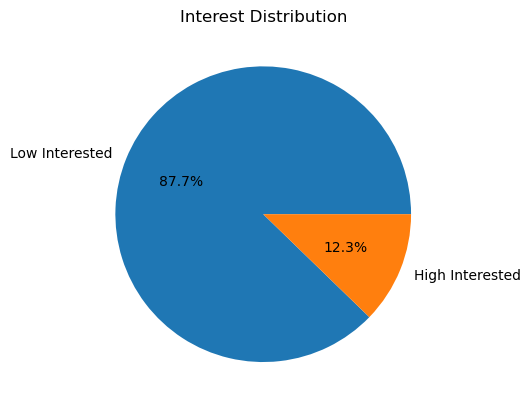

In [42]:
summary.plot(kind='pie', autopct='%1.1f%%')
plt.title('Interest Distribution')
plt.ylabel('')
plt.show()


## Limitations
- Analysis is based only on name and contact number.
- Actual interest may vary based on counseling and follow-up.
- This project is for academic and learning purposes.
